In [12]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

# from scipy.stats import binned_statistic_2d
# from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
import matplotlib
import matplotlib.cm as cm

# from abacusnbody.analysis.tsc import tsc_parallel
import time

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Import packages

sys.path.append('../src/')
# from filter_utils import *
from SZstacker import SZMapStacker # type: ignore
from stacker import SimulationStacker
from loadIO import load_data    
from utils import fft_smoothed_map, gaussian_smoothed_map

# sys.path.append('../../illustrisPython/')
import illustris_python as il # type: ignore

import yaml
import argparse
from pathlib import Path


In [11]:
# simPath = '/global/cfs/cdirs/m3363/rhliu/Simulations/'
sim = 'TNG100-1'
sim_type_name = 'IllustrisTNG'
simPath = '/pscratch/sd/r/rhliu/simulations/IllustrisTNG/' + sim + '/output/'

map_gas = load_data(simPath, sim_type_name, sim, 67, feedback=None, p_type='gas', n_pixels=2000, data_type='field')

In [15]:
# Now try the convolution methods:
stacker = SimulationStacker(sim, 67, 2000, sim_type_name, z=0.5)
cosmo = FlatLambdaCDM(H0=100 * stacker.header['HubbleParam'], Om0=stacker.header['Omega0'], Tcmb0=2.7255 * u.K)

# Get distance to the snapshot redshift
dA = cosmo.angular_diameter_distance(stacker.z).to(u.kpc).value

theta_arcmin = np.degrees(stacker.header['BoxSize'] / dA) * 60  # Convert to arcminutes
nPixels = map_gas.shape[0]
arcminPerPixel = theta_arcmin / nPixels  # Arcminutes per pixel, this is the true pixelSize after rounding.

map_gas_fft = fft_smoothed_map(map_gas, 1.6, arcminPerPixel)
map_gas_gauss = gaussian_smoothed_map(map_gas, 1.6, arcminPerPixel)

(array([4.210400e+04, 5.903850e+05, 2.061389e+06, 1.076757e+06,
        1.881710e+05, 3.235300e+04, 6.821000e+03, 1.649000e+03,
        3.170000e+02, 5.400000e+01]),
 array([-1.70417280e-04, -1.01741381e-04, -3.30654819e-05,  3.56104172e-05,
         1.04286316e-04,  1.72962215e-04,  2.41638115e-04,  3.10314014e-04,
         3.78989913e-04,  4.47665812e-04,  5.16341711e-04]),
 <BarContainer object of 10 artists>)

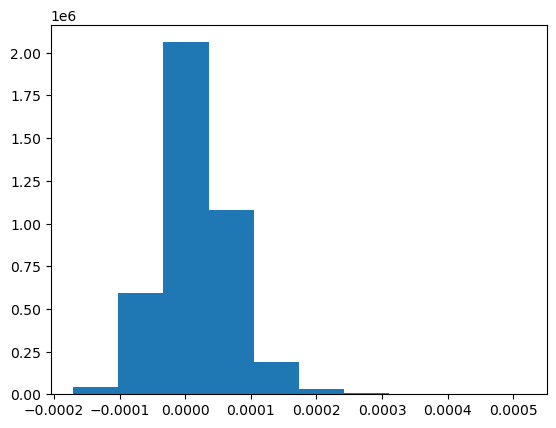

In [32]:
plt.hist(diff.flatten())

In [30]:
map_gas_fft.max()

41708883168.83559

In [37]:
data_path = '../data/Fig1_Fig8_dr10_allfoot_perbin_dr6_pzbin1.npz'
data = np.load(data_path)
data

NpzFile '../data/Fig1_Fig8_dr10_allfoot_perbin_dr6_pzbin1.npz' with keys: theta_arcmins, prof, cov

In [36]:
np.sqrt(np.diag(data['cov']))

array([ 0.09232379,  0.26972281,  0.58124754,  1.22699892,  2.20410098,
        3.72137921,  5.61231413,  8.16956061, 11.05600864])

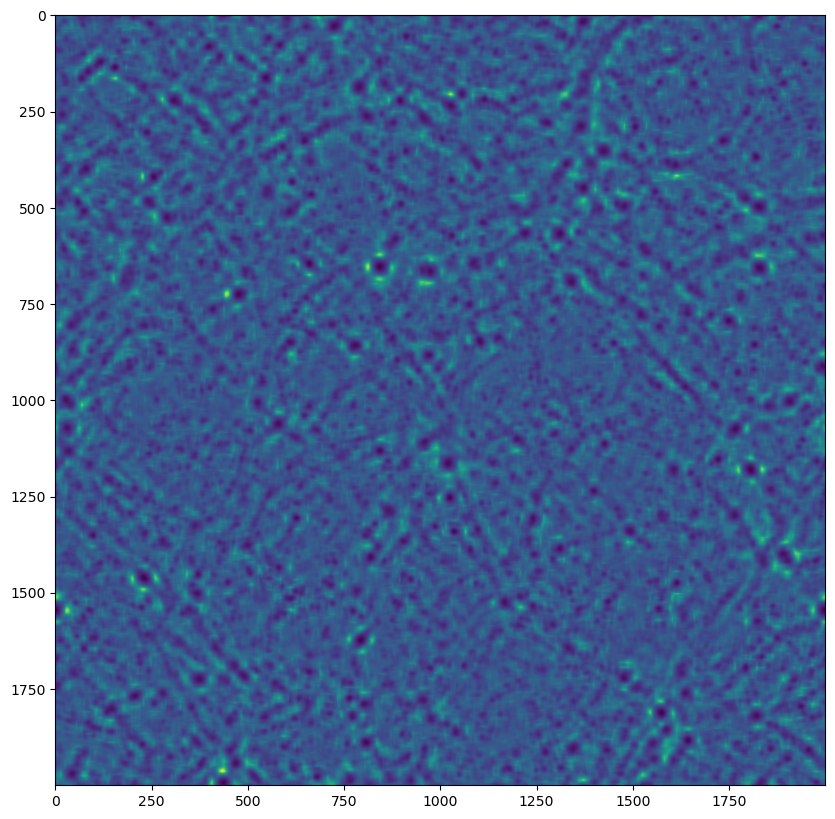

In [31]:
diff = (map_gas_fft - map_gas_gauss)/map_gas_fft
plt.figure(figsize=(10,10))

plt.imshow(diff, )
plt.show()

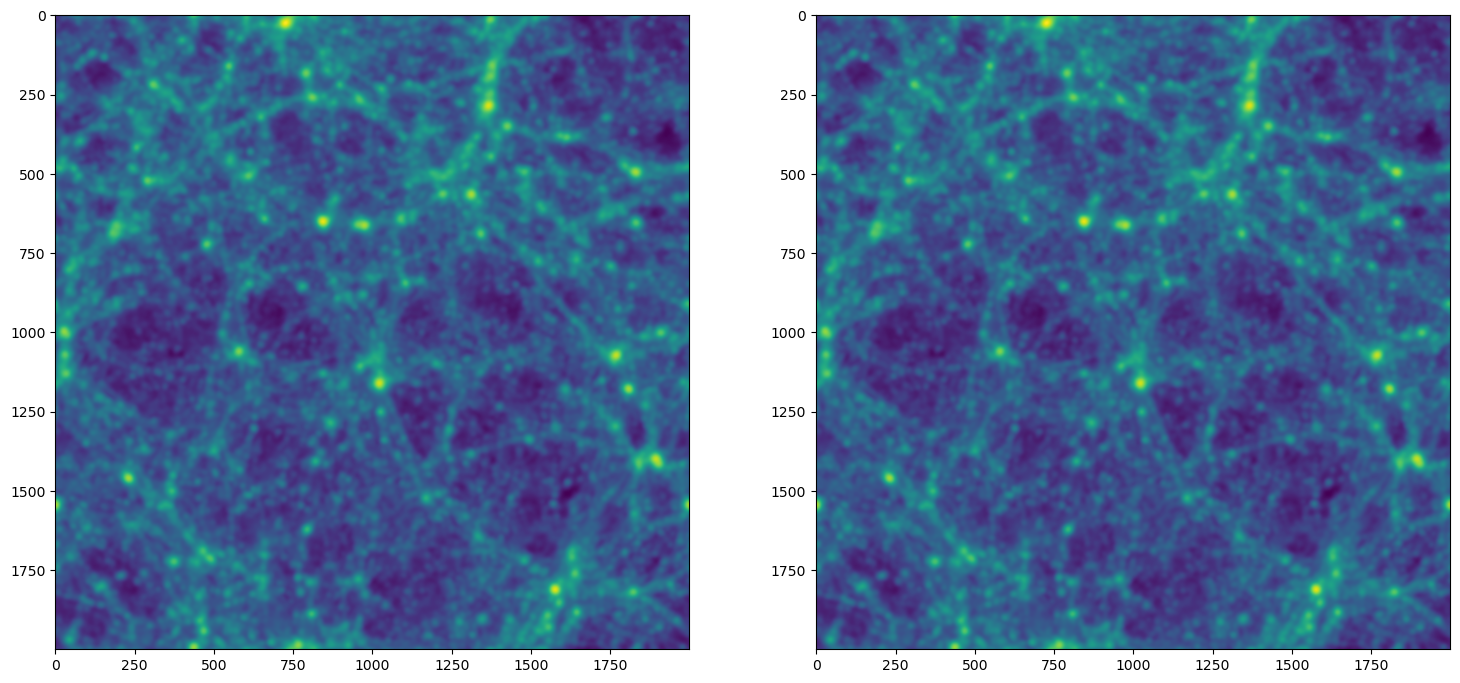

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(18,9))
norm = LogNorm()
ax[0].imshow(map_gas_fft, norm=norm)
ax[1].imshow(map_gas_gauss, norm=norm)

plt.show()